In [ ]:
#!pip install tslearn
#!pip install sktime
import pandas as pd
import numpy as np
import pathlib
from tqdm.notebook import tqdm
import librosa
import awkward as ak
import matplotlib.pyplot as plt
from IPython.display import Audio 
from scipy.signal import decimate
import tslearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sktime.datatypes._panel._convert import from_2d_array_to_nested
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import Rocket

In [ ]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

In [ ]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

In [ ]:
from sktime.transformations.panel.rocket import MiniRocket
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train= np.load("RavdessAudioOnlyNumpy__X_train.npy")
X_test = np.load("RavdessAudioOnlyNumpy__X_test.npy")
y_train= pd.read_csv("RavdessAudioOnlyNumpy__Y_train.csv")
y_test= pd.read_csv("RavdessAudioOnlyNumpy__Y_test.csv")

In [ ]:
start_index = 45000
end_index = 100000

selected_intervals = []
selected_intervals2 = []

for i in range(len(X_train)):
    selected_interval = X_train[i, start_index:end_index]
    selected_intervals.append(selected_interval)

selected_intervals = np.array(selected_intervals)

for i in range(len(X_test)):
    selected_interval2 = X_test[i, start_index:end_index]
    selected_intervals2.append(selected_interval2)

selected_intervals2 = np.array(selected_intervals2)


In [ ]:
X_train= selected_intervals
X_test= selected_intervals2


In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,54990,54991,54992,54993,54994,54995,54996,54997,54998,54999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000031,0.000000,0.000000,0.000000,...,0.008301,0.007874,0.007385,0.006714,0.005890,0.005188,0.004486,0.003754,0.003204,0.002716
1,0.000000,0.000031,0.000000,0.000000,0.000000,0.000000,-0.000031,-0.000031,0.000000,0.000000,...,0.013489,0.013031,0.012421,0.011871,0.011078,0.010284,0.009705,0.009460,0.009216,0.009064
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000061,0.000305,0.000580,0.000916,0.001434,0.001831,0.002045,0.002136,0.002075
3,-0.000031,-0.000031,-0.000031,-0.000061,-0.000031,-0.000031,-0.000092,-0.000092,-0.000061,-0.000092,...,-0.000763,-0.001190,-0.001617,-0.002106,-0.002563,-0.002991,-0.003510,-0.004059,-0.004456,-0.004730
4,0.000000,0.000000,-0.000061,0.000000,0.000000,-0.000031,-0.000061,0.000000,0.000000,0.000000,...,-0.001465,-0.002014,-0.002960,-0.003967,-0.005096,-0.006378,-0.007721,-0.008972,-0.009979,-0.010986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,-0.000031,0.000000,0.000000,0.000000,-0.000031,-0.000031,-0.000061,0.000000,0.000000,0.000000,...,0.001587,0.001678,0.001678,0.001740,0.001831,0.001892,0.001892,0.001923,0.001984,0.002014
1824,0.000000,0.000031,0.000000,0.000000,0.000000,0.000031,0.000000,0.000031,0.000000,0.000000,...,-0.001648,-0.001801,-0.002014,-0.002045,-0.001984,-0.001862,-0.001862,-0.001892,-0.001770,-0.001709
1825,0.000000,0.000000,0.000000,0.000000,0.000031,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.003876,-0.009033,-0.013641,-0.015594,-0.015869,-0.014648,-0.012970,-0.012360,-0.012756,-0.012878
1826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013123,0.012299,0.013000,0.018738,0.017761,0.013977,0.016998,0.022125,0.025848,0.026764


In [ ]:
len(X_train)

1828

In [ ]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
scaler = TimeSeriesScalerMinMax()
X_train = scaler.fit_transform(X_train).reshape(X_train.shape[0], X_train.shape[1])
X_test = scaler.fit_transform(X_test).reshape(X_test.shape[0], X_test.shape[1])

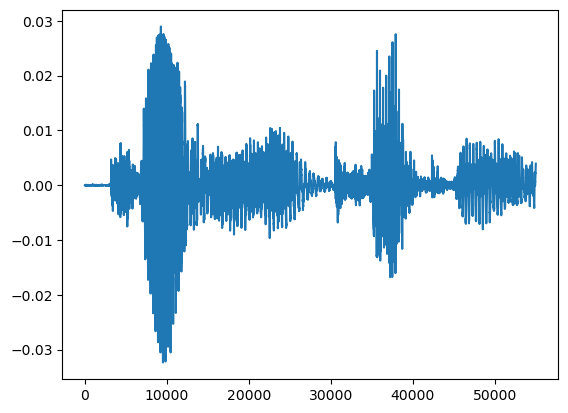

In [ ]:
plt.plot(pd.DataFrame(X_train[5]))

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
X_train_nested = pd.DataFrame(from_2d_array_to_nested(X_train))
X_test_nested = pd.DataFrame(from_2d_array_to_nested(X_test))

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train['emotion'])
y_test = encoder.transform(y_test['emotion'])


In [ ]:
y_train

array([5, 5, 5, ..., 7, 7, 7])

In [ ]:
%%time

rocket = Rocket()
rocket.fit(X_train_nested)
X_train_transform = rocket.transform(X_train_nested)
clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
clf.fit(X_train_transform, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

X_test_transform = rocket.transform(X_test_nested)
y_pred = clf.predict(X_test_transform)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.39      0.40      0.39        96
        calm       0.48      0.54      0.51        96
     disgust       0.34      0.27      0.30        48
     fearful       0.19      0.16      0.17        96
       happy       0.28      0.33      0.30        96
     neutral       0.47      0.42      0.44        48
         sad       0.27      0.31      0.29        96
   surprised       0.27      0.17      0.21        48

    accuracy                           0.33       624
   macro avg       0.33      0.32      0.33       624
weighted avg       0.33      0.33      0.33       624



In [ ]:
%%time

minirocket = MiniRocket()
minirocket.fit(X_train_nested)
X_train_transform_mini = minirocket.transform(X_train_nested)
clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
clf.fit(X_train_transform_mini, y_train)

CPU times: total: 7min 23s
Wall time: 7min 20s


RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]))

In [ ]:
X_test_transform_mini = minirocket.transform(X_test_nested)
y_pred = clf.predict(X_test_transform_mini)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.56      0.83      0.67        96
        calm       0.65      0.61      0.63        96
     disgust       0.54      0.60      0.57        48
     fearful       0.43      0.27      0.33        96
       happy       0.52      0.50      0.51        96
     neutral       0.70      0.54      0.61        48
         sad       0.52      0.59      0.56        96
   surprised       0.49      0.38      0.42        48

    accuracy                           0.55       624
   macro avg       0.55      0.54      0.54       624
weighted avg       0.55      0.55      0.54       624



In [ ]:
from pyts.classification import KNeighborsClassifier
from sklearn.metrics import classification_report

clf = KNeighborsClassifier(metric='euclidean')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.04      0.08        96
           1       0.12      0.19      0.14        96
           2       0.06      0.04      0.05        48
           3       0.29      0.10      0.15        96
           4       0.00      0.00      0.00        96
           5       0.15      0.08      0.11        48
           6       0.18      0.68      0.29        96
           7       0.15      0.04      0.07        48

    accuracy                           0.17       624
   macro avg       0.20      0.15      0.11       624
weighted avg       0.22      0.17      0.12       624

